# Init and aged Vehicle DVA

In [2]:
import os
import sys
import math
sys.path.append(os.path.join(os.getcwd().partition('nature_soh')[0], "nature_soh"))
from src.config_base import GeneralConfig

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator, FixedLocator
import matplotlib.patches as patches
import matplotlib.lines as mlines

In [4]:
from src.data.read_feather import ReadFeather
from src.filtering.filter_methods import FilterMethods
from src.voltage_capacity_analysis.dva import DVA
from src.visualization.config_visualization import VisualizationConfig, instantiate_matplotlib_parameters, cm2inch
instantiate_matplotlib_parameters()
from src.visualization.colormaps import ColorMaps

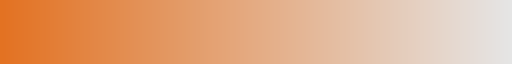

In [5]:
tum_orange_cmap = ColorMaps.orange_tum()
orange_colors = tum_orange_cmap(np.linspace(0,1, 10))
tum_orange_cmap

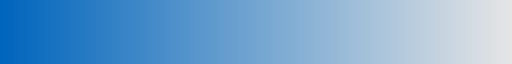

In [6]:
tum_blue_cmap = ColorMaps.blue_tum()
blue_colors = tum_blue_cmap(np.linspace(0,1, 10))
tum_blue_cmap

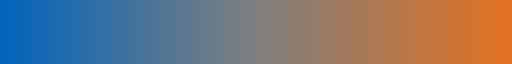

In [7]:
tum_cmap = ColorMaps.blue_orange_tum(grayscale=0.5)
colors = tum_cmap(np.linspace(0,1, 5))
tum_cmap

In [8]:
def filter_func_preprocess(signal):
    perc_filter = 1/100 * len(signal) #% filter
    filtered_signal = FilterMethods().rolling_mean_df(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter))
    #filtered_signal = FilterMethods().savgol(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter * len(signal)))
    return filtered_signal

In [9]:
read_feather = ReadFeather()
read_feather.set_filter_U(filter_func_preprocess)
read_feather.set_filter_Q(filter_func_preprocess)

## Load vehicle data

In [11]:
df_taycan =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Taycan","Taycan_JB_13A_CEE7_C36.feather"), lower_voltage=650, upper_voltage=830)
df_taycan_aged =  read_feather.read(os.path.join(GeneralConfig.path2data.value,"Taycan","Porsche_Taycan_JB_10A_CEE7_AMS.feather"),lower_voltage=650, upper_voltage=830)

H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q"] = df["Q"]-df["Q"].iloc[0] # reset Q counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["E"] = df["E"]-df["E"].iloc[0] # reset E counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [12]:
df_vw = read_feather.read(os.path.join(GeneralConfig.path2data.value,"VW","VW_ID3_JB_8A_C40_2021.feather"), lower_voltage=360, upper_voltage=450)
df_vw_aged = read_feather.read(os.path.join(GeneralConfig.path2data.value,"VW","VW_ID3_JB_8A_C40_2024.feather"), lower_voltage=360, upper_voltage=450)

H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q"] = df["Q"]-df["Q"].iloc[0] # reset Q counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["E"] = df["E"]-df["E"].iloc[0] # reset E counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [13]:
df_teslaY = read_feather.read(os.path.join(GeneralConfig.path2data.value,"Tesla","Tesla_Model_Y_JB_8A_CEE7_Miles_2025.feather"), lower_voltage=300, upper_voltage=400)
#df_teslaY_aged = read_feather.read(os.path.join(GeneralConfig.path2data.value,"Tesla","Tesla_Model_Y_JB_8A_CEE7_C40_2024.feather"), lower_voltage=300, upper_voltage=400)
df_teslaY_aged = read_feather.read(os.path.join(GeneralConfig.path2data.value,"Tesla","Tesla_Model_3_JB_8A_CEE7_2024_Tom_Winkler.feather"), lower_voltage=300, upper_voltage=400)

H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q"] = df["Q"]-df["Q"].iloc[0] # reset Q counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["E"] = df["E"]-df["E"].iloc[0] # reset E counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [14]:
df_tesla_aged = read_feather.read(os.path.join(GeneralConfig.path2data.value,"Tesla","Tesla_JB_6A_CEE7_C57_2025.feather"), lower_voltage=335, upper_voltage=365)

H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q"] = df["Q"]-df["Q"].iloc[0] # reset Q counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["E"] = df["E"]-df["E"].iloc[0] # reset E counter


In [15]:
## the sharp voltage increased of LFP cells can be filtered out, if the windowsize is too wide
def filter_func_preprocess_tesla(signal):
    perc_filter = 0.1/100 * len(signal) #% filter
    filtered_signal = FilterMethods().rolling_mean_df(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter))
    #filtered_signal = FilterMethods().savgol(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter * len(signal)))
    return filtered_signal

In [16]:
read_feather.set_filter_U(filter_func_preprocess_tesla)
read_feather.set_filter_Q(filter_func_preprocess_tesla)

In [17]:
df_tesla = read_feather.read(os.path.join(GeneralConfig.path2data.value,"Tesla","Tesla_JB_6A_CEE7_C57_2021.feather"), lower_voltage=335, upper_voltage=365)
#df_tesla_aged = read_feather.read(os.path.join(GeneralConfig.path2data.value,"Tesla","Tesla_JB_6A_CEE7_C57_2022.feather"), lower_voltage=335, upper_voltage=365)

H:\1000-Repositories\nature_soh\src\data\read_pickle.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q"] = df["Q"]-df["Q"].iloc[0] # reset Q counter
H:\1000-Repositories\nature_soh\src\data\read_pickle.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["E"] = df["E"]-df["E"].iloc[0] # reset E counter


### DVA

In [19]:
def filter_func_v(signal):
    perc_filter = 1 #% filter
    filtered_signal = FilterMethods().rolling_mean_numpy(signal,window_size=FilterMethods().round_to_next_odd_number(perc_filter/100 * len(signal)))
    filtered_signal_reverse = FilterMethods().rolling_mean_numpy(np.flip(signal),window_size=FilterMethods().round_to_next_odd_number(perc_filter/100 * len(signal)))
    return (filtered_signal+np.flip(filtered_signal_reverse))/2

In [20]:
dva_extractor = DVA()
dva_extractor.set_filter(filter_func_v)

In [21]:
dva_taycan, cap_taycan = dva_extractor.get_dva(time=df_taycan["time_h"], capacity=df_taycan["Q"], voltage=df_taycan["U"],crop_cap_Ah=(0,200))
dva_taycan_aged, cap_taycan_aged = dva_extractor.get_dva(time=df_taycan_aged["time_h"], capacity=df_taycan_aged["Q"], voltage=df_taycan_aged["U"],crop_cap_Ah=(0,200))

In [22]:
dva_vw, cap_vw = dva_extractor.get_dva(time=df_vw["time_h"], capacity=df_vw["Q"], voltage=df_vw["U"],crop_cap_Ah=(0,200))
dva_vw_aged, cap_vw_aged = dva_extractor.get_dva(time=df_vw_aged["time_h"], capacity=df_vw_aged["Q"], voltage=df_vw_aged["U"],crop_cap_Ah=(0,200))

In [23]:
dva_tesla, cap_tesla = dva_extractor.get_dva(time=df_tesla["time_h"], capacity=df_tesla["Q"], voltage=df_tesla["U"],crop_cap_Ah=(1,220))
dva_tesla_aged, cap_tesla_aged = dva_extractor.get_dva(time=df_tesla_aged["time_h"], capacity=df_tesla_aged["Q"], voltage=df_tesla_aged["U"],crop_cap_Ah=(1,220))

H:\1000-Repositories\nature_soh\src\voltage_capacity_analysis\vca_base.py:21: RuntimeWarning: divide by zero encountered in divide
  return np.gradient(signal) / np.gradient(time)
H:\1000-Repositories\nature_soh\src\voltage_capacity_analysis\dva.py:31: RuntimeWarning: invalid value encountered in divide
  dva = np.divide(diff_voltage, diff_cap)  # (dU*dt)/(dQ*dt) = dU/dQ


In [24]:
dva_teslaY, cap_teslaY = dva_extractor.get_dva(time=df_teslaY["time_h"], capacity=df_teslaY["Q"], voltage=df_teslaY["U"],crop_cap_Ah=(1,250))
dva_teslaY_aged, cap_teslaY_aged = dva_extractor.get_dva(time=df_teslaY_aged["time_h"], capacity=df_teslaY_aged["Q"], voltage=df_teslaY_aged["U"],crop_cap_Ah=(1,250))

## Figure

In [26]:
def plot_pocv_vw(axes):
    ax2 = axes.twiny()
    line1 = axes.plot(df_vw["Q"],df_vw["U"],color=VisualizationConfig.TUMblau.value,linewidth=1.5,label="$\ \ \ \ 400\,km$")
    line2 = axes.plot(df_vw_aged["Q"],df_vw_aged["U"],color=VisualizationConfig.TUMorange.value,linewidth=1.5,label="$40500\,km$")
    
    axes.set_ylabel(r"Vehicle voltage in V",fontsize=7)
    #axes.yaxis.set_label_coords(-0.05,0.5)
    #axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,150])
    tick_positions = np.array([0,50,100,150])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([25,75,125]))
    axes.set_ylim([360,450])
    tick_positions = np.array([360,390,420,450])
    axes.set_yticks(tick_positions)
    axes.tick_params('x', top=False, labeltop=False,bottom=True, labelbottom=False)
    axes.tick_params('y', left=True, labelleft=True,right=False, labelright=False)
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_vw["U"].mean()*(cap_vw)/1000,-10*np.ones(len(cap_vw)),color="white",linewidth=1.5)
    ax2.set_xlabel("Charged energy in kWh",fontsize=7)
    ax2.set_xlim(np.array([0,150]))
    tick_positions = np.array([0,50,100,150])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_vw.U.mean()/10000)*10:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([25,75,125]))
    # legend
    patch1 = mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='d', linestyle='None',
                          markersize=3, label='stage 2 shift')
    patch2 =  mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='o', linestyle='None',
                          markersize=3, label='H2 shift')
    axes.legend(handles=[line1[0], line2[0], patch1, patch2],loc="upper left",fontsize=5,ncols=2,handletextpad=0.4,handlelength=1.5,
               framealpha =1 , fancybox=False,labelspacing=0.2,columnspacing=0.7,edgecolor="black",title=r"$\bf{VW\ ID.3\ Pro\ Performance\ (C/NMC\,532)}$",title_fontsize=5,alignment='center')
    return axes

In [27]:
def plot_dva_vw(axes):
    ax2 = axes.twiny()
    axes.plot(cap_vw,dva_vw*2*78,color=VisualizationConfig.TUMblau.value,linewidth=1.5)
    axes.plot(cap_vw_aged,dva_vw_aged*2*78,color=VisualizationConfig.TUMorange.value,linewidth=1.5)
    
    axes.set_ylabel(r"$Q_{N}\cdot \frac{dU}{dQ}$ in V",fontsize=7)
    #axes.yaxis.set_label_coords(-0.05,0.5)
    axes.set_xlabel("Charged capacity in Ah",fontsize=7) 
    axes.set_xlim([0,150])
    tick_positions = np.array([0,50,100,150])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([25,75,125]))
    axes.set_ylim([0,216])
    tick_positions = np.array([0,51,108,108+108/2,216])
    axes.set_yticks(tick_positions)
    #axes.yaxis.set_minor_locator(FixedLocator([54,108+108/2]))
    axes.tick_params('x', top=False, labeltop=False,bottom=True, labelbottom=True)
    axes.tick_params('y', left=True, labelleft=True,right=False, labelright=False)
    axes.grid()
    axes.set_axisbelow(True) 
    # secondary x-axes 
    ax2.plot(df_vw["U"].mean()*(cap_vw)/1000,-10*np.ones(len(cap_vw)),color="white",linewidth=1.5)
    #ax2.set_xlabel("Charged energy in kWh")
    ax2.set_xlim(np.array([0,150]))
    tick_positions = np.array([0,50,100,150])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_vw.U.mean()/10000)*10:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([25,75,125]))
    ax2.tick_params('x', top=True, labeltop=False,bottom=True, labelbottom=False)
    return axes

In [28]:
def plot_pocv_taycan(axes):
    ax2 = axes.twiny()
    line1 = axes.plot(df_taycan["Q"],df_taycan["U"],color=VisualizationConfig.TUMblau.value,linewidth=1.5,label="$10000\,km$")
    line2 = axes.plot(df_taycan_aged["Q"],df_taycan_aged["U"],color=VisualizationConfig.TUMorange.value,linewidth=1.5,label="$70500\,km$")
    
    axes.set_ylabel(r"Vehicle voltage in V",fontsize=7)
    #axes.yaxis.set_label_coords(-0.05,0.5)
    #axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,120])
    tick_positions = np.array([0,40,80,120])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([20,60,100]))
    axes.set_ylim([650,830])
    tick_positions = np.array([650,695,740,785,830])
    axes.set_yticks(tick_positions)
    axes.tick_params('x', top=False, labeltop=False,bottom=True, labelbottom=False)
    axes.tick_params('y', left=True, labelleft=True,right=False, labelright=False)
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_taycan["U"].mean()*(cap_taycan)/1000,-10*np.ones(len(cap_taycan)),color="white",linewidth=1.5)
    ax2.set_xlabel("Charged energy in kWh",fontsize=7)
    ax2.set_xlim([0,120])
    tick_positions = np.array([0,40,80,120])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_taycan.U.mean()/10000)*10:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([20,60,100]))
    ax2.tick_params('x',which="both", top=True, labeltop=True,bottom=False, labelbottom=False)
    # legend
    patch1 = mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='d', linestyle='None',
                          markersize=3, label='stage 2 shift')
    #patch2 =  mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='o', linestyle='None',
    #                      markersize=3, label='H2 shift')
    axes.legend(handles=[line1[0], line2[0],patch1],loc="upper left",fontsize=5,ncols=2,handletextpad=0.4,handlelength=1.5,
               framealpha =1 , fancybox=False,labelspacing=0.2,columnspacing=0.7,edgecolor="black",title=r"$\bf{Porsche\ Taycan\ (C/NMC\,622)}$",title_fontsize=5,alignment='center')
    return axes

In [29]:
def plot_dva_taycan(axes):
    ax2 = axes.twiny()
    axes.plot(cap_taycan,dva_taycan*2*56,color=VisualizationConfig.TUMblau.value,linewidth=1.5)
    axes.plot(cap_taycan_aged,dva_taycan_aged*2*56,color=VisualizationConfig.TUMorange.value,linewidth=1.5)
    
    axes.set_ylabel(r"$Q_{N}\cdot \frac{dU}{dQ}$ in V")
    #axes.yaxis.set_label_coords(-0.05,0.5)
    axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,120])
    tick_positions = np.array([0,40,80,120])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([20,60,100]))
    axes.set_ylim([0,198*2])
    tick_positions = np.array([0,99,198,297,396])
    axes.set_yticks(tick_positions)
    #axes.yaxis.set_minor_locator(FixedLocator([99,297]))
    axes.tick_params('x',which="both", top=False, labeltop=False,bottom=True, labelbottom=True)
    #axes.yaxis.set_minor_locator(FixedLocator([385,435]))
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_taycan["U"].mean()*(cap_taycan)/1000,-10*np.ones(len(cap_taycan)),color="white",linewidth=1.5)
    #ax2.set_xlabel("Charged energy in kWh",fontsize=7)
    ax2.set_xlim(np.array([0,120]))
    tick_positions =  np.array([0,40,80,120])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_taycan.U.mean()/10000)*10:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([20,60,100]))
    ax2.tick_params('x',which="both", top=True, labeltop=False,bottom=False, labelbottom=False)
    return axes

In [30]:
def plot_pocv_tesla(axes):
    ax2 = axes.twiny()
    line1 = axes.plot(df_tesla["Q"],df_tesla["U"],color=VisualizationConfig.TUMblau.value,linewidth=1.5,label="$\ \ 1000\,km$")
    line2 = axes.plot(df_tesla_aged["Q"],df_tesla_aged["U"],color=VisualizationConfig.TUMorange.value,linewidth=1.5,label="$80100\,km$")
    
    axes.set_ylabel(r"Vehicle voltage in V",fontsize=7)
    #axes.yaxis.set_label_coords(-0.05,0.5)
    #axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,160])
    tick_positions = np.array([0,40,80,120,160])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([20,60,100,140]))
    axes.set_ylim([335,365])
    tick_positions = np.array([335,345,355,365])
    axes.set_yticks(tick_positions)
    axes.tick_params('x', top=False, labeltop=False,bottom=True, labelbottom=False)
    axes.tick_params('y', left=True, labelleft=True,right=False, labelright=False)
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_tesla["U"].mean()*(df_tesla)/1000,-10*np.ones(len(df_tesla)),color="white",linewidth=1.5)
    ax2.set_xlabel("Charged energy in kWh",fontsize=7)
    ax2.set_xlim([0,160])
    tick_positions = np.array([0,40,80,120,160])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_tesla.U.mean()/1000)*1:.0f}" for label in tick_positions[:-1]]+[56])
    ax2.xaxis.set_minor_locator(FixedLocator([20,60,100,140]))
    ax2.tick_params('x',which="both", top=True, labeltop=True,bottom=False, labelbottom=False)
    # legend
    patch1 = mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='d', linestyle='None',
                          markersize=3, label='stage 2 shift')
    #patch2 =  mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='o', linestyle='None',
    #                      markersize=3, label='H2 shift')
    axes.legend(handles=[line1[0], line2[0],patch1],loc="upper left",fontsize=5,ncols=2,handletextpad=0.4,handlelength=1.5,
               framealpha =1 , fancybox=False,labelspacing=0.05,columnspacing=0.7,edgecolor="black",title=r"$\bf{Tesla\ Model\ 3\ SR+\ (C/LFP)}$",title_fontsize=5,alignment='center')
    return axes

In [31]:
def plot_dva_tesla(axes):
    ax2 = axes.twiny()
    axes.plot(cap_tesla,dva_tesla*161,color=VisualizationConfig.TUMblau.value,linewidth=1.5)
    axes.plot(cap_tesla_aged,dva_tesla_aged*161,color=VisualizationConfig.TUMorange.value,linewidth=1.5)
    
    axes.set_ylabel(r"$Q_{N}\cdot \frac{dU}{dQ}$ in V")
    #axes.yaxis.set_label_coords(-0.05,0.5)
    axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,160])
    tick_positions = np.array([0,40,80,120,160])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([20,60,100,140]))
    axes.set_ylim([0,106*2])
    tick_positions = np.array([0,53,106,159,212])
    axes.set_yticks(tick_positions)
    #axes.set_ylim([0,106])
    #tick_positions = np.array([0,53/2,53,53+53/2,106])
    #axes.set_yticks(tick_positions)
    #axes.yaxis.set_minor_locator(FixedLocator([53/2,53+53/2]))
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_tesla["U"].mean()*(cap_tesla)/1000,-10*np.ones(len(cap_tesla)),color="white",linewidth=1.5)
   # ax2.set_xlabel("Charged energy in kWh")
    ax2.set_xlim([0,160])
    tick_positions = np.array([0,40,80,120,160])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_tesla.U.mean()/1000)*1:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([20,60,100,140]))
    ax2.tick_params('x',which="both", top=True, labeltop=False,bottom=False, labelbottom=False)
    return axes

In [32]:
def plot_pocv_teslaY(axes):
    ax2 = axes.twiny()
    line1 = axes.plot(df_teslaY["Q"],df_teslaY["U"],color=VisualizationConfig.TUMblau.value,linewidth=1.5,label="$24800\,km$")
    line2 = axes.plot(df_teslaY_aged["Q"],df_teslaY_aged["U"],color=VisualizationConfig.TUMorange.value,linewidth=1.5,label="$77600\,km$")
    
    axes.set_ylabel(r"Vehicle voltage in V",fontsize=7)
    #axes.yaxis.set_label_coords(-0.05,0.5)
    #axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,220])
    tick_positions = np.array([0,55,110,165,220])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([22.5,77.5,132.5,187.5]))
    axes.set_ylim([300,400])
    tick_positions = np.array([300,325,350,375,400])
    axes.set_yticks(tick_positions)
    axes.tick_params('x', top=False, labeltop=False,bottom=True, labelbottom=False)
    axes.tick_params('y', left=True, labelleft=True,right=False, labelright=False)
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_tesla["U"].mean()*(df_teslaY)/1000,-10*np.ones(len(df_teslaY)),color="white",linewidth=1.5)
    ax2.set_xlabel("Charged energy in kWh",fontsize=7)
    ax2.set_xlim([0,220])
    tick_positions = np.array([0,55,110,165,220])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_teslaY.U.mean()/10000)*10:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([22.5,77.5,132.5,187.5]))
    ax2.tick_params('x',which="both", top=True, labeltop=True,bottom=False, labelbottom=False)
    #legend
    patch1 = mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='d', linestyle='None',
                          markersize=3, label='stage 2 shift')
    patch2 =  mlines.Line2D([], [], color='gray', markeredgecolor="k", marker='o', linestyle='None',
                          markersize=3, label='H2 shift')
    axes.legend(handles=[line1[0], line2[0], patch1, patch2],loc="upper left",fontsize=5,ncols=2,handletextpad=0.4,handlelength=1.5,
               framealpha =1 , fancybox=False,labelspacing=0.2,columnspacing=0.7,edgecolor="black",title=r"$\bf{Tesla\ Model\ Y\ LR\ (C/NMC\,811)}$",title_fontsize=5,alignment='center')
    return axes

In [33]:
def plot_dva_teslaY(axes):
    ax2 = axes.twiny()
    axes.plot(cap_teslaY,dva_teslaY*5*46,color=VisualizationConfig.TUMblau.value,linewidth=1.5)
    axes.plot(cap_teslaY_aged,dva_teslaY_aged*5*46,color=VisualizationConfig.TUMorange.value,linewidth=1.5)
    
    axes.set_ylabel(r"$Q_{N}\cdot \frac{dU}{dQ}$ in V")
    #axes.yaxis.set_label_coords(-0.05,0.5)
    axes.set_xlabel("Charged capacity in Ah") 
    axes.set_xlim([0,220])
    tick_positions = np.array([0,55,110,165,220])
    axes.set_xticks(tick_positions)
    axes.xaxis.set_minor_locator(FixedLocator([22.5,77.5,132.5,187.5]))
    axes.set_ylim([0,96*2])
    tick_positions = np.array([0,48,48*2,144,96*2])
    axes.set_yticks(tick_positions)
    #axes.yaxis.set_minor_locator(FixedLocator([48,144]))
    axes.grid()
    axes.set_axisbelow(True)
    # secondary x-axes 
    ax2.plot(df_tesla["U"].mean()*(cap_teslaY)/1000,-10*np.ones(len(cap_teslaY)),color="white",linewidth=1.5)
    # ax2.set_xlabel("Charged energy in kWh")
    ax2.set_xlim([0,220])
    tick_positions = np.array([0,55,110,165,220])
    ax2.set_xticks(tick_positions)
    ax2.set_xticklabels([f"{round(label*df_teslaY.U.mean()/10000)*10:.0f}" for label in tick_positions])
    ax2.xaxis.set_minor_locator(FixedLocator([22.5,77.5,132.5,187.5]))
    ax2.tick_params('x',which="both", top=True, labeltop=False,bottom=False, labelbottom=False)
    return axes

In [34]:
VisualizationConfig.textheight_in_cm_max.value

18.5

## Features of interest pOCV

In [36]:
def add_FOI_vw_pocv(axes):
    deltaQ = df_vw.Q.max() - df_vw_aged.Q.max()
    deltaE = df_vw.E.max() - df_vw_aged.E.max()
    rectangle = patches.Rectangle((df_vw_aged.Q.max(),360), deltaQ, 450-360,fc="lightgray",ec="lightgray",alpha=0.7)
    axes.add_artist(rectangle)
    axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$ | $\Delta E$ = {deltaE:.1f}$\,kWh$',
                  (0.6, 0.02), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
                 horizontalalignment = "center", verticalalignment = "bottom")
    #axes.annotate(text='', xy=(145,440), xytext=(115,440), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    #axes.annotate(text=f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$'+'\n'+f'$\Delta E$ = {deltaE:.1f}$\,kWh$', xy=(150,420),horizontalalignment="right",verticalalignment="bottom",fontsize=5)#,bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.7))
    return axes

In [37]:
def add_FOI_taycan_pocv(axes):
    deltaQ = df_taycan.Q.max() - df_taycan_aged.Q.max()
    deltaE = df_taycan.E.max() - df_taycan_aged.E.max()
    rectangle = patches.Rectangle((df_taycan_aged.Q.max(),650), deltaQ, 830-650,fc="lightgray",ec="lightgray",alpha=0.7)
    axes.add_artist(rectangle)
    axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$ | $\Delta E$ = {deltaE:.1f}$\,kWh$',
                  (0.6, 0.02), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
                 horizontalalignment = "center", verticalalignment = "bottom")
    # axes.annotate(text='', xy=(115,820), xytext=(90,820), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    # axes.annotate(text=f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$'+'\n'+f'$\Delta E$ = {deltaE:.1f}$\,kWh$', xy=(120,785),horizontalalignment="right",verticalalignment="bottom",fontsize=5)#,bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.7))
    return axes

In [38]:
def add_FOI_tesla_pocv(axes):
    deltaQ = df_tesla.Q.max() - df_tesla_aged.Q.max()
    deltaE = df_tesla.E.max() - df_tesla_aged.E.max()
    rectangle = patches.Rectangle((df_tesla_aged.Q.max(),335), deltaQ, 365-335,fc="lightgray",ec="lightgray",alpha=0.7)
    axes.add_artist(rectangle)
    axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$ | $\Delta E$ = {deltaE:.1f}$\,kWh$',
                  (0.6, 0.02), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
                 horizontalalignment = "center", verticalalignment = "bottom",bbox=dict(boxstyle='square,pad=0',fc='lightgray', ec='none', alpha=0.6))
    # axes.annotate(text='', xy=(159,363), xytext=(140,363), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    # axes.annotate(text=f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$'+'\n'+f'$\Delta E$ = {deltaE:.1f}$\,kWh$', xy=(121,357.5),horizontalalignment="left",verticalalignment="bottom",fontsize=5)#,bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.7))
    return axes

In [39]:
def add_FOI_teslaY_pocv(axes):
    deltaQ =  df_teslaY.Q.max() - df_teslaY_aged.Q.max() #
    deltaE = df_teslaY.E.max() - df_teslaY_aged.E.max()
    rectangle = patches.Rectangle((df_teslaY_aged.Q.max(),300), deltaQ+1, 400-300,fc="lightgray",ec="lightgray",alpha=0.7)
    axes.add_artist(rectangle)
    axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$ | $\Delta E$ = {deltaE:.1f}$\,kWh$',
                  (0.6, 0.02), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
                 horizontalalignment = "center", verticalalignment = "bottom")
    # axes.annotate(text='', xy=(195,395), xytext=(155,395), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    # axes.annotate(text=f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$'+'\n'+f'$\Delta E$ = {deltaE:.1f}$\,kWh$', xy=(200,375),horizontalalignment="right",verticalalignment="bottom",fontsize=5)#,bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.7))
    return axes

## Degradation Mode assessment

In [78]:
def DMs_vw_dva():
    print(f"Energy I: {np.max(df_vw.E):.2f}")
    print(f"Energy II: {np.max(df_vw_aged.E):.2f}")
    total_cap_loss = np.max(cap_vw_aged)-np.max(cap_vw)
    print(f"Capacity I: {np.max(cap_vw):.2f}")
    print(f"Capacity II: {np.max(cap_vw_aged):.2f}")
    print(f"Total capacity loss = {total_cap_loss:.2f}")
    #anode
    stage_2_init_dva =np.max(dva_vw[cap_vw>80])
    stage_2_init_cap =cap_vw[dva_vw==stage_2_init_dva]
    
    stage_2_aged_dva =np.max(dva_vw_aged[cap_vw_aged>80])
    stage_2_aged_cap =cap_vw_aged[dva_vw_aged==stage_2_aged_dva]

    delta_stage_2 = stage_2_aged_cap.values[0]-stage_2_init_cap.values[0]
    print(f"Q_NE I: {stage_2_init_cap.values[0]:.2f}")
    print(f"Q_NE II: {stage_2_aged_cap.values[0]:.2f}")
    print(f"LAM_NE = {delta_stage_2:.2f} Ah")
    # cathode
    c_init_dva =np.max(dva_vw[(cap_vw>120)&(cap_vw<140)])
    c_init_cap =cap_vw[dva_vw==c_init_dva]
    
    c_aged_dva =np.max(dva_vw_aged[(cap_vw_aged>120)&(cap_vw_aged<130)])
    c_aged_cap =cap_vw_aged[dva_vw_aged==c_aged_dva]
    delta_H_2 = (np.max(cap_vw_aged)-c_aged_cap.values[0])-(np.max(cap_vw)-c_init_cap.values[0])
    print(f"Q_PE I: {(np.max(cap_vw)-c_init_cap.values[0]):.2f}")
    print(f"Q_PE II: {(np.max(cap_vw_aged)-c_aged_cap.values[0]):.2f}")
    print(f"LAM_PE = {delta_H_2:.2f}")
    # LLI
    dQB =  (np.max(cap_vw_aged)-stage_2_aged_cap.values[0])-(np.max(cap_vw)-stage_2_init_cap.values[0])
    print(f"Q_B I: {(np.max(cap_vw)-stage_2_init_cap.values[0]):.2f}")
    print(f"Q_B II: {(np.max(cap_vw_aged)-stage_2_aged_cap.values[0]):.2f}")
    print(f"dQB= {dQB:.2f}")
    delta_LLI = dQB - delta_H_2
    print(f"LLI = {delta_LLI:.2f}")
    return {"stage_2_init_dva":stage_2_init_dva,
           "stage_2_init_cap":stage_2_init_cap,
           "stage_2_aged_dva":stage_2_aged_dva,
           "stage_2_aged_cap":stage_2_aged_cap,
           "c_init_dva":c_init_dva,
           "c_init_cap":c_init_cap,
           "c_aged_dva":c_aged_dva,
           "c_aged_cap":c_aged_cap}
scatter_dict_vw=DMs_vw_dva()

Energy I: 59.55
Energy II: 57.16
Capacity I: 146.63
Capacity II: 140.57
Total capacity loss = -6.06
Q_NE I: 85.62
Q_NE II: 85.83
LAM_NE = 0.20 Ah
Q_PE I: 13.29
Q_PE II: 12.02
LAM_PE = -1.26
Q_B I: 61.01
Q_B II: 54.75
dQB= -6.27
LLI = -5.00


In [86]:
def DMs_taycan_dva():
    print(f"Energy I: {np.max(df_taycan.E):.2f}")
    print(f"Energy II: {np.max(df_taycan_aged.E):.2f}")
    total_cap_loss = np.max(cap_taycan_aged)-np.max(cap_taycan)
    print(f"Capacity I: {np.max(cap_taycan):.2f}")
    print(f"Capacity II: {np.max(cap_taycan_aged):.2f}")
    print(f"Total capacity loss = {total_cap_loss:.2f}")
    #anode
    stage_2_init_dva =np.max(dva_taycan[cap_taycan>60])
    stage_2_init_cap =cap_taycan[dva_taycan==stage_2_init_dva]
    
    stage_2_aged_dva =np.max(dva_taycan_aged[cap_taycan_aged>60])
    stage_2_aged_cap =cap_taycan_aged[dva_taycan_aged==stage_2_aged_dva]

    delta_stage_2 = stage_2_aged_cap.values[0]-stage_2_init_cap.values[0]
    print(f"Q_NE I: {stage_2_init_cap.values[0]:.2f}")
    print(f"Q_NE II: {stage_2_aged_cap.values[0]:.2f}")
    print(f"LAM_NE = {delta_stage_2:.2f} Ah")
    # cathode # cannot be determined
    c_init_dva = 0 #np.max(dva_taycan[(cap_taycan>80)&(cap_taycan<100)])
    c_init_cap = 0 #cap_taycan[dva_taycan==c_init_dva]
    
    c_aged_dva = 0 #np.max(dva_taycan_aged[(cap_taycan_aged>80)&(cap_taycan_aged<100)])
    c_aged_cap = 0 #cap_taycan_aged[dva_taycan_aged==c_aged_dva]
    delta_H_2 = 0#(np.max(cap_taycan_aged)-c_aged_cap.values[0])-(np.max(cap_taycan)-c_init_cap.values[0])
    print(f"Q_PE I: {0}")
    print(f"Q_PE II: {0}")
    print(f"LAM_PE = {delta_H_2:.2f}")
    # LLI
    dQB =  (np.max(cap_taycan_aged)-stage_2_aged_cap.values[0])-(np.max(cap_taycan)-stage_2_init_cap.values[0])
    print(f"Q_B I: {(np.max(cap_taycan)-stage_2_init_cap.values[0]):.2f}")
    print(f"Q_B II: {(np.max(cap_taycan_aged)-stage_2_aged_cap.values[0]):.2f}")
    print(f"dQB= {dQB:.2f}")
    delta_LLI = dQB - delta_H_2
    print(f"LLI = {delta_LLI:.2f}")
    return {"stage_2_init_dva":stage_2_init_dva,
           "stage_2_init_cap":stage_2_init_cap,
           "stage_2_aged_dva":stage_2_aged_dva,
           "stage_2_aged_cap":stage_2_aged_cap,
           "c_init_dva":c_init_dva,
           "c_init_cap":c_init_cap,
           "c_aged_dva":c_aged_dva,
           "c_aged_cap":c_aged_cap}
scatter_dict_taycan = DMs_taycan_dva()

Energy I: 82.65
Energy II: 79.31
Capacity I: 111.68
Capacity II: 106.62
Total capacity loss = -5.06
Q_NE I: 69.07
Q_NE II: 69.42
LAM_NE = 0.35 Ah
Q_PE I: 0
Q_PE II: 0
LAM_PE = 0.00
Q_B I: 42.61
Q_B II: 37.20
dQB= -5.41
LLI = -5.41


In [81]:
def DMs_tesla_dva():
    print(f"Energy I: {np.max(df_tesla.E):.2f}")
    print(f"Energy II: {np.max(df_tesla_aged.E):.2f}")
    total_cap_loss = np.max(cap_tesla_aged)-np.max(cap_tesla)
    print(f"Capacity I: {np.max(cap_tesla):.2f}")
    print(f"Capacity II: {np.max(cap_tesla_aged):.2f}")
    print(f"Total capacity loss = {total_cap_loss:.2f}")
    #anode
    stage_2_init_dva =np.max(dva_tesla[(cap_tesla>80)&(cap_tesla<100)])
    stage_2_init_cap =cap_tesla[dva_tesla==stage_2_init_dva]
    
    stage_2_aged_dva =np.max(dva_tesla_aged[(cap_tesla_aged>80)&(cap_tesla_aged<100)])
    stage_2_aged_cap =cap_tesla_aged[dva_tesla_aged==stage_2_aged_dva]

    delta_stage_2 = stage_2_aged_cap.values[0]-stage_2_init_cap.values[0]
    print(f"Q_NE I: {stage_2_init_cap.values[0]:.2f}")
    print(f"Q_NE II: {stage_2_aged_cap.values[0]:.2f}")
    print(f"LAM_NE = {delta_stage_2:.2f} Ah")
    # cathode # no PE feature for LFP cells
    c_init_dva = 0 #np.max(dva_tesla[(cap_tesla>80)&(cap_tesla<100)])
    c_init_cap = 0 #cap_tesla[dva_tesla==c_init_dva]
    
    c_aged_dva = 0 #np.max(dva_tesla_aged[(cap_tesla_aged>80)&(cap_tesla_aged<100)])
    c_aged_cap = 0 #cap_tesla_aged[dva_tesla_aged==c_aged_dva]
    delta_H_2 = 0 #(np.max(cap_tesla_aged)-c_aged_cap.values[0])-(np.max(cap_tesla)-c_init_cap.values[0])
    print(f"Q_PE I: {0}")
    print(f"Q_PE II: {0}")
    print(f"LAM_PE = {delta_H_2:.2f}")
    # LLI
    dQB =  (np.max(cap_tesla_aged)-stage_2_aged_cap.values[0])-(np.max(cap_tesla)-stage_2_init_cap.values[0])
    print(f"Q_B I: {(np.max(cap_tesla)-stage_2_init_cap.values[0]):.2f}")
    print(f"Q_B II: {(np.max(cap_tesla_aged)-stage_2_aged_cap.values[0]):.2f}")
    print(f"dQB= {dQB:.2f}")
    delta_LLI = dQB - delta_H_2
    print(f"LLI = {delta_LLI:.2f}")
    return {"stage_2_init_dva":stage_2_init_dva,
           "stage_2_init_cap":stage_2_init_cap,
           "stage_2_aged_dva":stage_2_aged_dva,
           "stage_2_aged_cap":stage_2_aged_cap,
           "c_init_dva":c_init_dva,
           "c_init_cap":c_init_cap,
           "c_aged_dva":c_aged_dva,
           "c_aged_cap":c_aged_cap}
scatter_dict_tesla = DMs_tesla_dva()

Energy I: 56.41
Energy II: 51.61
Capacity I: 159.71
Capacity II: 146.77
Total capacity loss = -12.95
Q_NE I: 93.15
Q_NE II: 91.73
LAM_NE = -1.42 Ah
Q_PE I: 0
Q_PE II: 0
LAM_PE = 0.00
Q_B I: 66.56
Q_B II: 55.03
dQB= -11.53
LLI = -11.53


In [84]:
def DMs_teslaY_dva():
    print(f"Energy I: {np.max(df_teslaY.E):.2f}")
    print(f"Energy II: {np.max(df_teslaY_aged.E):.2f}")
    total_cap_loss = np.max(cap_teslaY_aged)-np.max(cap_teslaY)
    print(f"Capacity I: {np.max(cap_teslaY):.2f}")
    print(f"Capacity II: {np.max(cap_teslaY_aged):.2f}")
    print(f"Total capacity loss = {total_cap_loss:.2f}")
    #anode
    stage_2_init_dva =np.max(dva_teslaY[(cap_teslaY>110)&(cap_teslaY<130)])
    stage_2_init_cap =cap_teslaY[dva_teslaY==stage_2_init_dva]
    
    stage_2_aged_dva =np.max(dva_teslaY_aged[(cap_teslaY_aged>110)&(cap_teslaY_aged<130)])
    stage_2_aged_cap =cap_teslaY_aged[dva_teslaY_aged==stage_2_aged_dva]

    delta_stage_2 = stage_2_aged_cap.values[0]-stage_2_init_cap.values[0]
    print(f"Q_NE I: {stage_2_init_cap.values[0]:.2f}")
    print(f"Q_NE II: {stage_2_aged_cap.values[0]:.2f}")
    print(f"LAM_NE = {delta_stage_2:.2f} Ah")
    #cathode
    c_init_dva =np.max(dva_teslaY[(cap_teslaY>130)&(cap_teslaY<165)])
    c_init_cap =cap_teslaY[dva_teslaY==c_init_dva]
    
    c_aged_dva =np.max(dva_teslaY_aged[(cap_teslaY_aged>130)&(cap_teslaY_aged<165)])
    c_aged_cap =cap_teslaY_aged[dva_teslaY_aged==c_aged_dva]
    delta_H_2 = (np.max(cap_teslaY_aged)-c_aged_cap.values[0])-(np.max(cap_teslaY)-c_init_cap.values[0])
    print(f"Q_PE I: {(np.max(cap_teslaY)-c_init_cap.values[0]):.2f}")
    print(f"Q_PE II: {(np.max(cap_teslaY_aged)-c_aged_cap.values[0]):.2f}")
    print(f"LAM_PE = {delta_H_2:.2f}")
    # LLI
    dQB =  (np.max(cap_teslaY_aged)-stage_2_aged_cap.values[0])-(np.max(cap_teslaY)-stage_2_init_cap.values[0])
    print(f"Q_B I: {(np.max(cap_teslaY)-stage_2_init_cap.values[0]):.2f}")
    print(f"Q_B II: {(np.max(cap_teslaY_aged)-stage_2_aged_cap.values[0]):.2f}")
    print(f"dQB= {dQB:.2f}")
    delta_LLI = dQB - delta_H_2
    print(f"LLI = {delta_LLI:.2f}")
    return {"stage_2_init_dva":stage_2_init_dva,
           "stage_2_init_cap":stage_2_init_cap,
           "stage_2_aged_dva":stage_2_aged_dva,
           "stage_2_aged_cap":stage_2_aged_cap,
           "c_init_dva":c_init_dva,
           "c_init_cap":c_init_cap,
           "c_aged_dva":c_aged_dva,
           "c_aged_cap":c_aged_cap}
scatter_dict_teslaY = DMs_teslaY_dva()

Energy I: 75.42
Energy II: 74.22
Capacity I: 207.91
Capacity II: 205.21
Total capacity loss = -2.70
Q_NE I: 116.82
Q_NE II: 114.66
LAM_NE = -2.16 Ah
Q_PE I: 50.52
Q_PE II: 50.32
LAM_PE = -0.20
Q_B I: 91.09
Q_B II: 90.55
dQB= -0.54
LLI = -0.34


## Features of interest DVA

In [48]:
def add_FOI_vw_dva(axes, scatter_dict):
    Q_nom = 2*78
    #anode  
    axes.scatter(scatter_dict["stage_2_init_cap"],scatter_dict["stage_2_init_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    axes.scatter(scatter_dict["stage_2_aged_cap"],scatter_dict["stage_2_aged_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    axes.annotate(text='', xy=(scatter_dict["stage_2_init_cap"]+5,170), xytext=(scatter_dict["stage_2_init_cap"]-5,170),fontsize=9,
                      arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{NE}=0.2\,Ah$', xy=(scatter_dict["stage_2_init_cap"]-2,180),fontsize=5,ha="center")
    # cathode
    axes.scatter(scatter_dict["c_init_cap"],scatter_dict["c_init_dva"]*Q_nom,marker="o",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    axes.scatter(scatter_dict["c_aged_cap"],scatter_dict["c_aged_dva"]*Q_nom,marker="o",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    axes.annotate(text='', xy=(scatter_dict["c_aged_cap"]+5+2,140), xytext=(scatter_dict["c_aged_cap"]-5+2,140),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{PE}=1.3\,Ah$', xy=(scatter_dict["c_aged_cap"]+2,150+2),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))
    # LLI
    axes.annotate(text='', xy=(np.max(cap_vw_aged)+5+2,95), xytext=(np.max(cap_vw_aged)-5+2,95),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{B}=6.3\,Ah$', xy=(np.max(cap_vw_aged)-2,73),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))
    # m phase shift
    axes.annotate(text='', xy=(80,55), xytext=(67,104), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    axes.annotate(text='M shift', xy=(83,53),horizontalalignment="left",verticalalignment="bottom",fontsize=5)
    # cap loss 
    #deltaQ = df_vw.Q.max() - df_vw_aged.Q.max()
    #rectangle = patches.Rectangle((df_vw_aged.Q.max(),0), deltaQ, 216,fc="lightgray",ec="lightgray",alpha=0.7)
    #axes.add_artist(rectangle)
    #axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$',
    #              (0.6, 0.05), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
    #             horizontalalignment = "center", verticalalignment = "bottom")
    return axes

In [49]:
def add_FOI_taycan_dva(axes,scatter_dict):
    Q_nom = 2*56
    #anode  
    axes.scatter(scatter_dict["stage_2_init_cap"],scatter_dict["stage_2_init_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    axes.scatter(scatter_dict["stage_2_aged_cap"],scatter_dict["stage_2_aged_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    axes.annotate(text='', xy=(scatter_dict["stage_2_init_cap"]+4,310), xytext=(scatter_dict["stage_2_init_cap"]-4,310),fontsize=9,
                      arrowprops=dict(arrowstyle='->', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{NE}=0.3\,Ah$', xy=(scatter_dict["stage_2_init_cap"],330),fontsize=5,ha="center")
    # cathode
    # axes.scatter(scatter_dict["c_init_cap"],scatter_dict["c_init_dva"]*Q_nom,marker="o",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    # axes.scatter(scatter_dict["c_aged_cap"],scatter_dict["c_aged_dva"]*Q_nom,marker="o",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    # axes.annotate(text='', xy=(scatter_dict["c_aged_cap"]+4,200), xytext=(scatter_dict["c_aged_cap"]-4,200),fontsize=9,
    #                   arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{PE}=?$', xy=(95,240),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))
    # LLI
    axes.annotate(text=r'$\Delta Q_{B}=5.4\,Ah$', xy=(np.max(cap_taycan_aged)-1+3,140),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))
    axes.annotate(text='', xy=(np.max(cap_taycan_aged)+4+3,175), xytext=(np.max(cap_taycan_aged)-4+3,175),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    
    # m phase shift
    axes.annotate(text='', xy=(60,198/2), xytext=(50,187), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    axes.annotate(text='M shift', xy=(62,102),horizontalalignment="left",verticalalignment="bottom",fontsize=5)
    # cap loss 
    #deltaQ = df_taycan.Q.max() - df_taycan_aged.Q.max()
    #rectangle = patches.Rectangle((df_taycan_aged.Q.max(),0), deltaQ, 396,fc="lightgray",ec="lightgray",alpha=0.7)
    #axes.add_artist(rectangle)
    #axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$',
    #              (0.6, 0.05), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
    #             horizontalalignment = "center", verticalalignment = "bottom")
    return axes

In [50]:
def add_FOI_tesla_dva(axes,scatter_dict):
    Q_nom = 161
    #anode  
    axes.scatter(scatter_dict["stage_2_init_cap"],scatter_dict["stage_2_init_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    axes.scatter(scatter_dict["stage_2_aged_cap"],scatter_dict["stage_2_aged_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    axes.annotate(text='', xy=(scatter_dict["stage_2_init_cap"]+4-2,78), xytext=(scatter_dict["stage_2_init_cap"]-4-2,78),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{NE}=1.4\,Ah$', xy=(scatter_dict["stage_2_init_cap"],90),fontsize=5,ha="center")
    
    # LLI
    axes.annotate(text='', xy=(np.max(cap_tesla_aged)+4+7,115), xytext=(np.max(cap_tesla_aged)-4-1,115),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{B}=11.5\,Ah$', xy=(np.max(cap_tesla_aged)-1,130),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))
    # axes.annotate(text='', xy=(159,70), xytext=(140,70), arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0,facecolor="k"))
    # axes.annotate(text='=', xy=(96,54),horizontalalignment="right",verticalalignment="bottom",fontsize=15)
    # cap loss 
    #deltaQ = df_tesla.Q.max() - df_tesla_aged.Q.max()
    #rectangle = patches.Rectangle((df_tesla_aged.Q.max(),0), deltaQ, 216,fc="lightgray",ec="lightgray",alpha=0.7)
    #axes.add_artist(rectangle)
    #axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$',
    #              (0.6, 0.05), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
    #             horizontalalignment = "center", verticalalignment = "bottom")
    return axes

In [51]:
def add_FOI_teslaY_dva(axes,scatter_dict):
    Q_nom = 46*5
    #anode  
    axes.scatter(scatter_dict["stage_2_init_cap"],scatter_dict["stage_2_init_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    axes.scatter(scatter_dict["stage_2_aged_cap"],scatter_dict["stage_2_aged_dva"]*Q_nom,marker="d",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    axes.annotate(text='', xy=(scatter_dict["stage_2_init_cap"]+5,150), xytext=(scatter_dict["stage_2_init_cap"]-5,150),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{NE}=2.2\,Ah$', xy=(scatter_dict["stage_2_init_cap"]-2,160),fontsize=5,ha="center")
    # cathode
    axes.scatter(scatter_dict["c_init_cap"],scatter_dict["c_init_dva"]*Q_nom,marker="o",color=VisualizationConfig.TUMblau.value,s=10,zorder=5,ec="k")
    axes.scatter(scatter_dict["c_aged_cap"],scatter_dict["c_aged_dva"]*Q_nom,marker="o",color=VisualizationConfig.TUMorange.value,s=10,zorder=5,ec="k")
    
    axes.annotate(text='', xy=(scatter_dict["c_aged_cap"]+5,140), xytext=(scatter_dict["c_aged_cap"]-5,140),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{PE}=0.2\,Ah$', xy=(scatter_dict["c_aged_cap"]+2,150),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))
    # LLI
    axes.annotate(text='', xy=(np.max(cap_teslaY_aged)+5,100), xytext=(np.max(cap_teslaY_aged)-5-5,100),fontsize=9,
                      arrowprops=dict(arrowstyle='<-', shrinkA=0, shrinkB=0,facecolor="k", mutation_scale=5)) 
    axes.annotate(text=r'$\Delta Q_{B}=0.5\,Ah$', xy=(np.max(cap_teslaY_aged)-3,110),fontsize=5,ha="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0.6))

    # cap loss 
    #deltaQ = 200 - df_tesla_aged.Q.max()
    #rectangle = patches.Rectangle((df_tesla_aged.Q.max(),0), deltaQ, 192,fc="lightgray",ec="lightgray",alpha=0.7)
    #axes.add_artist(rectangle)
    #axes.annotate(f'$\Delta Q$ = {deltaQ:.1f}$\,Ah$',
    #              (0.6, 0.05), xycoords=rectangle,rotation=90, annotation_clip=True,fontsize=5,
    #             horizontalalignment = "center", verticalalignment = "bottom")
    return axes

C:\Users\ga97req\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\ga97req\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\ga97req\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\ga97req\AppData\Local\anaconda3\Lib\site-packages\matplotlib\text.py:566: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use

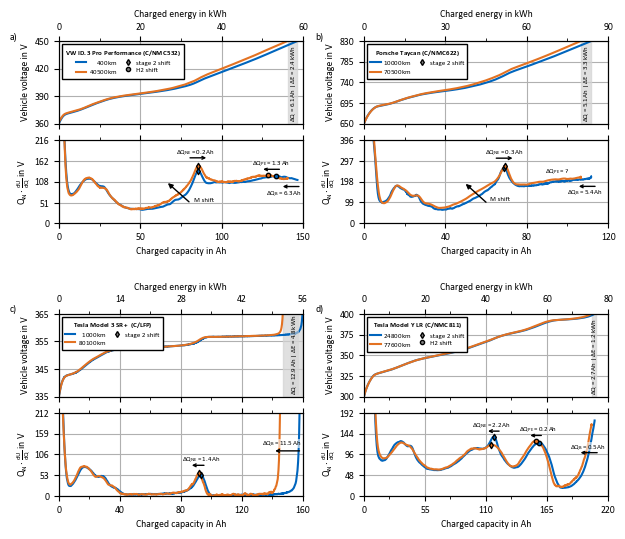

In [52]:
fig = plt.figure(figsize=(cm2inch(VisualizationConfig.textwidth_in_cm.value),
                                                cm2inch(15))) #constrained layout = True does not work with wspace/hspace
#gs= fig.add_gridspec(nrows=4, ncols=2,width_ratios=[1,1],height_ratios=[1.5,1,1.5,1])

gs = fig.add_gridspec(2, 1,height_ratios=[1,1],hspace=0.5)

gs0 = gs[0].subgridspec(2, 2, width_ratios=[1,1],height_ratios=[1,1],wspace=0.25)
gs1 = gs[1].subgridspec(2, 2, width_ratios=[1,1],height_ratios=[1,1],wspace=0.25)
# Volkswagen 
axes1 = fig.add_subplot(gs0[0, 0])
axes1 = plot_pocv_vw(axes1)
axes1 = add_FOI_vw_pocv(axes1)
axes2 = fig.add_subplot(gs0[0, 1])
axes2 = plot_pocv_taycan(axes2)
axes2 = add_FOI_taycan_pocv(axes2)
axes3 = fig.add_subplot(gs0[1, 0])
axes3 = plot_dva_vw(axes3)
axes3 = add_FOI_vw_dva(axes3,scatter_dict_vw)
axes4 = fig.add_subplot(gs0[1, 1])
axes4 = plot_dva_taycan(axes4)
axes4 = add_FOI_taycan_dva(axes4,scatter_dict_taycan)
#align y labels
axes1.yaxis.set_label_coords(-0.12, 0.5)
axes3.yaxis.set_label_coords(-0.105, 0.5) # lower, due to the fraction
axes2.yaxis.set_label_coords(-0.12, 0.5)
axes4.yaxis.set_label_coords(-0.105, 0.5)
## Tesla
axes5 = fig.add_subplot(gs1[0, 0])
axes5 = plot_pocv_tesla(axes5)
axes5 = add_FOI_tesla_pocv(axes5)
axes6 = fig.add_subplot(gs1[0, 1])
axes6 = plot_pocv_teslaY(axes6)
axes6 = add_FOI_teslaY_pocv(axes6)
axes7 = fig.add_subplot(gs1[1, 0])
axes7 = plot_dva_tesla(axes7)
axes7 = add_FOI_tesla_dva(axes7,scatter_dict_tesla)
axes8 = fig.add_subplot(gs1[1, 1])
axes8 = plot_dva_teslaY(axes8)
axes8 = add_FOI_teslaY_dva(axes8,scatter_dict_teslaY)
#align y labels
axes5.yaxis.set_label_coords(-0.12, 0.5)
axes7.yaxis.set_label_coords(-0.105, 0.5) # lower, due to the fraction
axes6.yaxis.set_label_coords(-0.12, 0.5)
axes8.yaxis.set_label_coords(-0.105, 0.5)
#fig.tight_layout()
axes1.text(-0.2, 1.05, 'a)', horizontalalignment='left',fontsize=7,
     verticalalignment='center', transform=axes1.transAxes)
axes2.text(-0.2, 1.05, r'b)', horizontalalignment='left',fontsize=7,
     verticalalignment='center', transform=axes2.transAxes)
axes5.text(-0.2, 1.05, r'c)', horizontalalignment='left',fontsize=7,
     verticalalignment='center', transform=axes5.transAxes)
axes6.text(-0.2, 1.05, r'd)', horizontalalignment='left',fontsize=7,
     verticalalignment='center', transform=axes6.transAxes)

fig.savefig(os.path.join(GeneralConfig.path2figures.value,"04-POCV_soh_assessment.pdf"))
fig.savefig(os.path.join(GeneralConfig.path2figures.value,"04-POCV_soh_assessment.png"),dpi=300, pad_inches = 0)

In [53]:
df_teslaY["Q"].max()*df_teslaY["U"].mean()

75545.32344928007

In [54]:
210/4

52.5

In [55]:
220/4

55.0

In [56]:
df_teslaY["E"].max()

75.42072166794344

In [57]:
df_teslaY_aged["E"].max()

74.21811101514808

In [58]:
96

96

In [59]:
df_teslaY.tail()

,index,UnixTimeSeconds528,ChargeHoursRemaining132,U,RawBattCurrent132,I,BattBeginningOfLifeEnergy292,SOCmax292,SOC,SOCUI292,...,UI_Range,UI_SOC,UI_uSOE,UI_ratedWHpM,time_ms,time_s,time_min,time_h,Q,E
16651,17534,1.738767e+09,30.0,399.946156,-4.310000,4.2,78.8,100.0,100.0,100.0,...,314.0,17,101,1023,165950000.0,165950.0,2765.833333,46.097222,207.852383,75.402445
16652,17535,1.738767e+09,30.0,399.956844,-3.943434,4.1,78.8,100.0,100.0,100.0,...,314.0,17,101,1023,165960000.0,165960.0,2766.000000,46.100000,207.866108,75.407056
16653,17536,1.738767e+09,30.0,399.967783,-4.276500,4.1,78.8,100.0,100.0,100.0,...,314.0,17,101,1023,165970000.0,165970.0,2766.166667,46.102778,207.879831,75.411611
16654,17537,1.738767e+09,30.0,399.978723,-3.850000,4.1,78.8,100.0,100.0,100.0,...,314.0,17,101,1023,165980000.0,165980.0,2766.333333,46.105556,207.893551,75.416166
16655,17538,1.738767e+09,30.0,399.989810,-4.273500,4.1,78.8,100.0,100.0,100.0,...,314.0,17,101,1023,165990000.0,165990.0,2766.500000,46.108333,207.907192,75.420722


In [60]:
df_teslaY_aged.tail()

,index,UnixTimeSeconds528,ChargeHoursRemaining132,U,RawBattCurrent132,I,BattBeginningOfLifeEnergy292,SOCmax292,SOC,SOCUI292,...,UI_Range,UI_SOC,UI_uSOE,UI_ratedWHpM,time_ms,time_s,time_min,time_h,Q,E
16796,18755,1.730029e+09,30.0,399.960045,-4.254500,4.209,78.8,100.0,100.0,100.0,...,286.0,81,102,1023.0,167580000.0,167580.0,2793.000000,46.550000,205.164362,74.199553
16797,18756,1.730029e+09,30.0,399.969394,-4.153500,4.200,78.8,100.0,100.0,100.0,...,286.0,81,102,1023.0,167590000.0,167590.0,2793.166667,46.552778,205.175914,74.204224
16798,18757,1.730029e+09,30.0,399.977994,-4.000000,4.200,78.8,100.0,100.0,100.0,...,286.0,81,102,1023.0,167600000.0,167600.0,2793.333333,46.555556,205.187468,74.208891
16799,18758,1.730029e+09,30.0,399.986401,-3.951531,4.100,78.8,100.0,100.0,100.0,...,286.0,81,102,1023.0,167610000.0,167610.0,2793.500000,46.558333,205.199023,74.213502
16800,18759,1.730029e+09,30.0,399.994808,-4.250000,4.197,78.8,100.0,100.0,100.0,...,286.0,81,102,1023.0,167620000.0,167620.0,2793.666667,46.561111,205.210578,74.218111
